In [83]:
import os
from os.path import realpath, join
import sys
sys.path.insert(0, '/home/chuah/mitsuba3-camera/build/python')

import drjit as dr
import mitsuba as mi
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

mi.set_variant('cuda_ad_dispersion')
# mi.set_variant('cuda_ad_rgb')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [84]:
SCENE_DIR = realpath('../tutorials/scenes')

# Make sure that resources from the scene directory can be found
mi.Thread.thread().file_resolver().append(SCENE_DIR)

In [85]:
output_dir = realpath(join('.', 'outputs', 'lens'))
os.makedirs(output_dir, exist_ok=True)
print('[i] Results will be saved to:', output_dir)

[i] Results will be saved to: /home/chuah/mitsuba3-camera/notebooks/outputs/lens


# Set lens parameters

### (Asphere) Panasonic Lumix G 25mm F1.7 Asph
US 2017/0059832 Example 4. 15 surfaces with 4 aspheric surfaces (2 elements).

**Note:** this one works for high field angles! preferred IMO

**Note:** light leakage issues for $\theta=0$, need to investigate

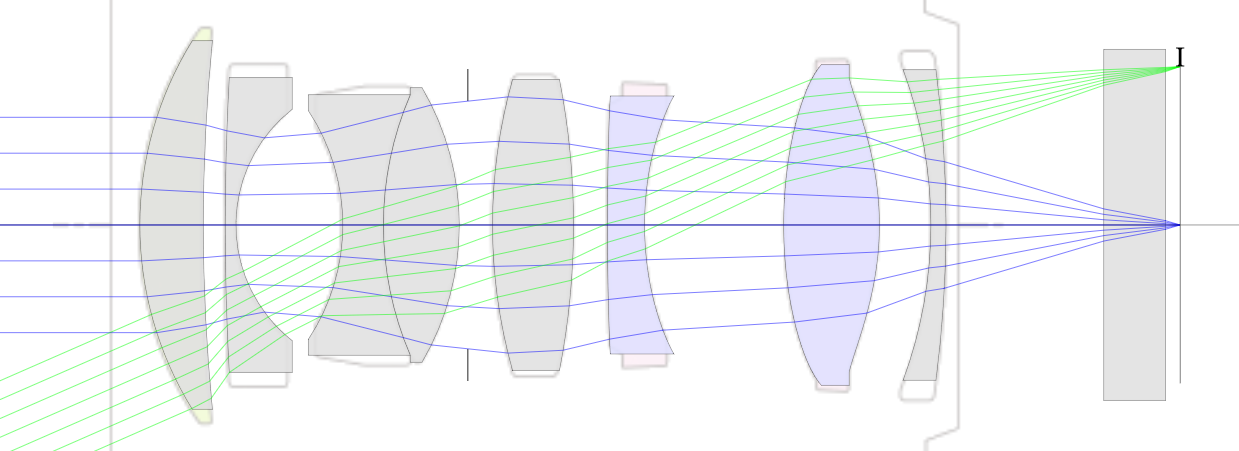

In [86]:
# from scripts.lens_design.lens import ConicSurface, EvenAsphericSurface, LensMaterial, LensSystem
# import numpy as np

# curvature_radii = [23.8785, 127.8616, 183.8699, 10.0557, -14.1493, 22.4277, -18.52, np.inf, 36.688, -51.7984, 253.2104, 22.1105, 31.3591, -20.3491, -30.6242, -82.3348, np.inf, np.inf]
# thicknesses = [4.3, 1.5265, 0.7, 7.3268, 2.77, 5.15, 0.6, 1.7, 5.5, 2.35, 2.5, 9.5295, 6.5, 3.5472, 1, 10.8, 4.2, 1]
# elem_radii = [12.57, 12.57, 10.06, 7.91, 7.82, 8.88, 9.36, 8.4525, 9.93, 9.93, 8.79, 8.79, 10.94, 10.04, 10.59, 10.59, 11.98, 11.98]

# mats = [
#         LensMaterial("glass_A", 2.00069, 25.5),
#         LensMaterial(),
#         LensMaterial("glass_B", 1.51742, 52.1),
#         LensMaterial(),
#         LensMaterial("glass_C", 1.75211, 25),
#         LensMaterial("glass_D", 1.72916, 54.7),
#         LensMaterial(),
#         LensMaterial(),
#         LensMaterial("glass_E", 1.8042, 46.5),
#         LensMaterial(),
#         LensMaterial("glass_F", 1.5338, 55.6),
#         LensMaterial(),
#         LensMaterial("glass_F", 1.5338, 55.6),
#         LensMaterial(),
#         LensMaterial("glass_G", 1.58144, 40.9),
#         LensMaterial(),
#         LensMaterial("glass_H", 1.5168, 64.2),
#         LensMaterial(),
# ]

# aperture_tbl_index = 8
# aspheric_data = {
#         11: [0.0, 1.61E-05, -5.82E-07, -2.10E-09, 7.71E-10, -2.11E-11, 2.39E-13, -1.01E-15],
#         12: [0.0, 1.81E-05, 1.28E-06,  -1.04E-07, 3.57E-09, -6.09E-11, 5.06E-13, -1.58E-15],
#         13: [0.0, 1.78E-05, 2.02E-07,  -9.59E-09, 2.58E-10, -3.40E-12, 2.23E-14, -5.27E-17],
#         14: [0.0, 4.87E-05, -1.56E-07, 3.63E-09, -5.25E-11, 9.48E-13, -9.91E-15, 4.47E-17],
# }

# target_focal_length = 25.8784
# num_sources = 5
# fov = 47.26
# max_field_angle = 0.5 * fov
# init_camera_z = 0.3

### (Asph) Schneider Super-Symmar XL 5.6 / 110 Asph
US 5,870,234 Example 2. 11 surfaces with one aspheric *surface* only.

Wide angle lens, but the paraxial entrance pupil isn't a good approximation. Max field angle is $16^{o}$ in practice

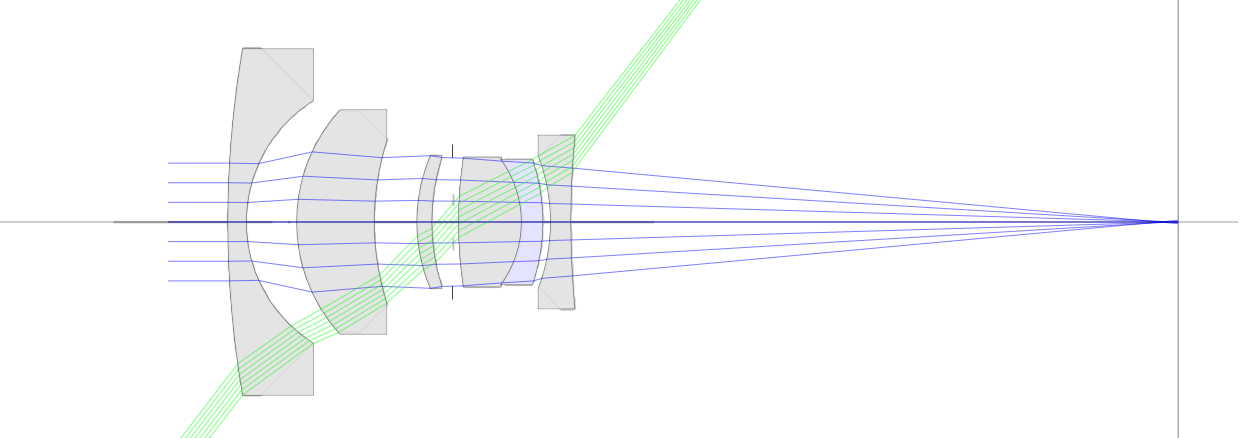

In [87]:
# from scripts.lens_design.lens import ConicSurface, EvenAsphericSurface, LensMaterial, LensSystem
# import numpy as np

# curvature_radii = [169.672, 23.884, 27.751, 44.624, 28.382, 35.229, np.inf, 73.026, -17.622, -31.197, -30.837, 152.036, ]
# thicknesses = [3, 8.465, 12.86, 7.19, 2.4, 3.5, 1.035, 10.47, 3.5, 1.36, 3.3, 101.27, ]
# elem_radii = [28.83, 20.24, 18.67, 13.55, 11.09, 10.795, 10.6965, 10.78, 10.435, 10.435, 11.08, 14.44, ]

# mats = [
#         LensMaterial("glass_A", 1.52583, 51.25),
#         LensMaterial(),
#         LensMaterial("glass_B", 1.75844, 52.09),
#         LensMaterial(),
#         LensMaterial("glass_B", 1.75844, 52.09),
#         LensMaterial(),
#         LensMaterial(),
#         LensMaterial("glass_C", 1.59142, 61.03),
#         LensMaterial("glass_D", 1.62408, 36.12),
#         LensMaterial(),
#         LensMaterial("glass_E", 1.50349, 56.13),
#         LensMaterial(),
# ]

# aperture_tbl_index = 7
# aspheric_data = {
#         10: [0.236438877, 8.71E-06, 1.22E-08, -4.90E-11, 3.57E-13, 0.00E+00, 0.00E+00, 0.00E+00],
# }

# target_focal_length = 110.64
# num_sources = 2
# fov = 105.0
# max_field_angle = 16.0
# init_camera_z = 0.05

### Nikon

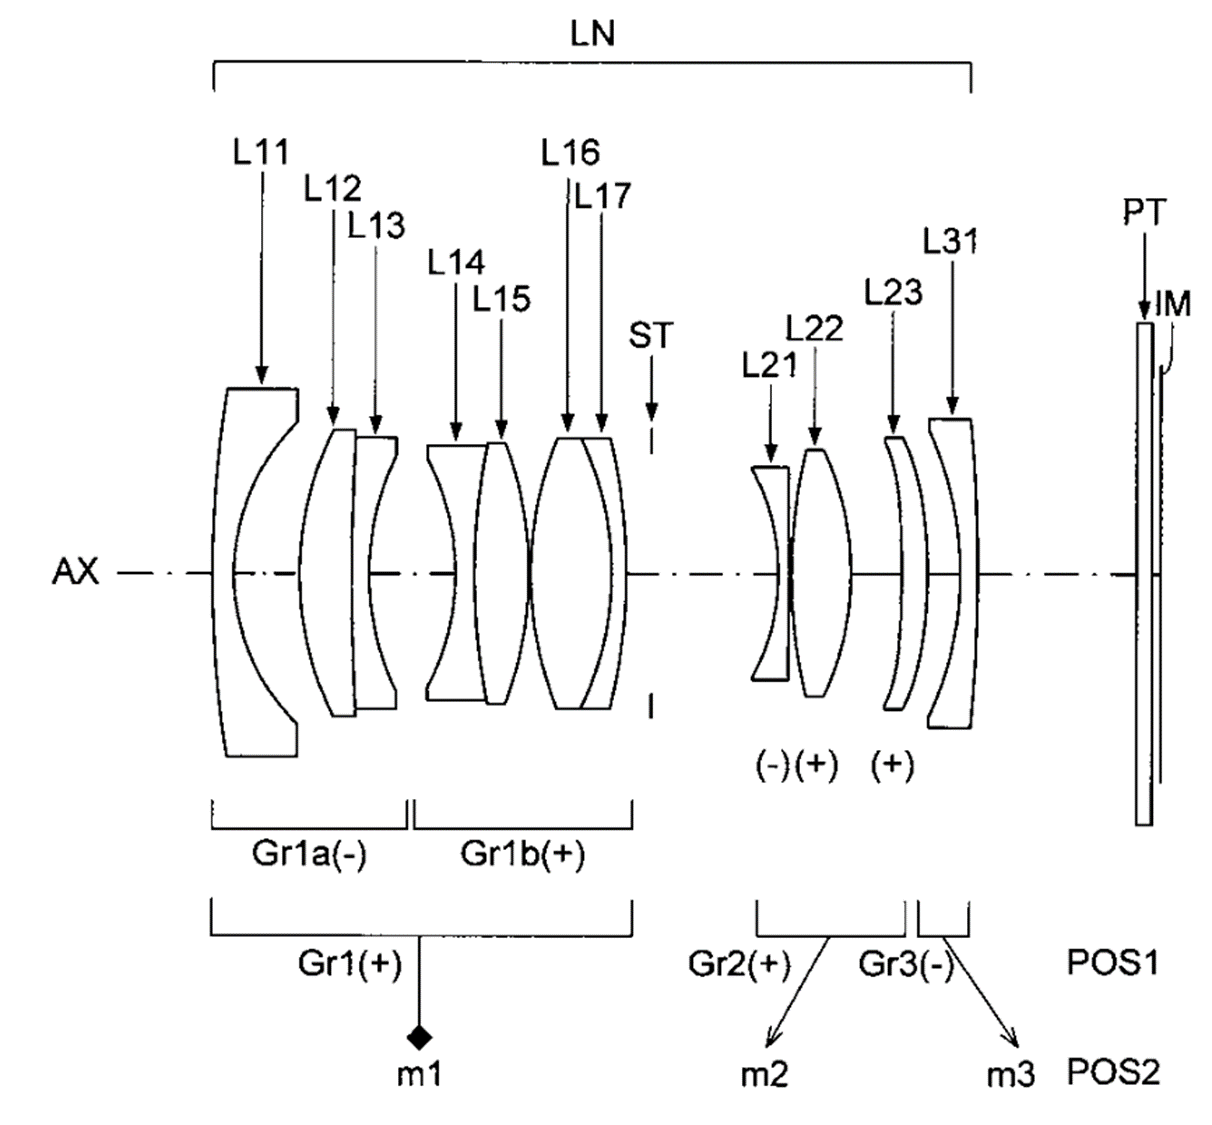

In [88]:
from scripts.lens_design.lens import ConicSurface, EvenAsphericSurface, LensMaterial, LensSystem
import numpy as np

curvature_radii = [5.2674, 0.9607, 1.442, 10.2799, 1.2154, -1.0987, 2.9183, -1.6693, 1.6429, -1.4116, -2.5725, np.inf, -0.973, -24.0801, 2.3756, -1.3055, -7.3169, -2.2, -1.5449, -7.2572, np.inf, np.inf]
thicknesses = [0.102, 0.309, 0.246, 0.083, 0.411, 0.088, 0.258, 0.009, 0.379, 0.069, 0.118, 0.604, 0.051, 0.009, 0.282, 0.239, 0.122, 0.154, 0.083, 0.75, 0.074, 0.0425]
elem_radii = [0.847, 0.696, 0.661, 0.625, 0.546, 0.524, 0.586, 0.601, 0.624, 0.613, 0.607, 0.555, 0.476, 0.49, 0.543, 0.569, 0.604, 0.627, 0.662, 0.712, 1.2, 1.2]

mats = [
        LensMaterial("glass_A", 1.5168, 64.12),
        LensMaterial(),
        LensMaterial("glass_B", 1.9027, 35.72),
        LensMaterial("glass_C", 1.5955, 39.21),
        LensMaterial(),
        LensMaterial("glass_D", 1.699, 30.05),
        LensMaterial("glass_E", 1.9108, 35.25),
        LensMaterial(),
        LensMaterial("glass_F", 1.5928, 68.62),
        LensMaterial("glass_G", 1.7205, 34.7),
        LensMaterial(),
        LensMaterial(),
        LensMaterial("glass_H", 1.5927, 35.31),
        LensMaterial(),
        LensMaterial("glass_F", 1.5928, 68.62),
        LensMaterial(),
        LensMaterial("glass_I", 1.6935, 53.2),
        LensMaterial(),
        LensMaterial("glass_J", 1.4875, 70.44),
        LensMaterial(),
        LensMaterial("glass_A", 1.5168, 64.12),
        LensMaterial(),
]

aperture_tbl_index = 12
# NOTE: switching from real asphere data to zeroed-out versions!
aspheric_data = {
        # init
        # 17: [0, -0.24, -0.4268, 0.00E+00, 0.00E+00, 0.00E+00, 0.00E+00, 0.00E+00],
        # 18: [0, -0.05053, -0.3491, 0.1459, 0.07718, 0.00E+00, 0.00E+00, 0.00E+00],
        # sphere-only
        17: [0.0 for _ in range(8)],
        18: [0.0 for _ in range(8)],
        # # optim result
        # 17: [0.0, -0.09490284323692322,-0.10803833603858948,-0.08069773763418198,-0.01646527275443077,-0.007415791507810354,-0.503877580165863,-3.2629644870758057],
        # 18: [0.0, 0.07706142961978912, 0.06080370396375656, -0.015299857594072819, -0.16691075265407562, -0.38500601053237915, -0.5226516723632812, 0.1124117523431778],
}

target_focal_length = 1.57
num_sources = 6
fov = 64.9
max_field_angle = 0.5 * fov
# # initial asphere
# init_camera_z = 0.01
# sphere-only
init_camera_z = 0.99

### Parse lens design

aperture_index=10
22
Focal length target:  [1.5734491348266602]  vs.  1.57
BFL focus target:  [0.045883748680353165]  vs.  0.0425
Exit pupil position:  2.3486416339874268
Entrance pupil position:  3.3314104080200195


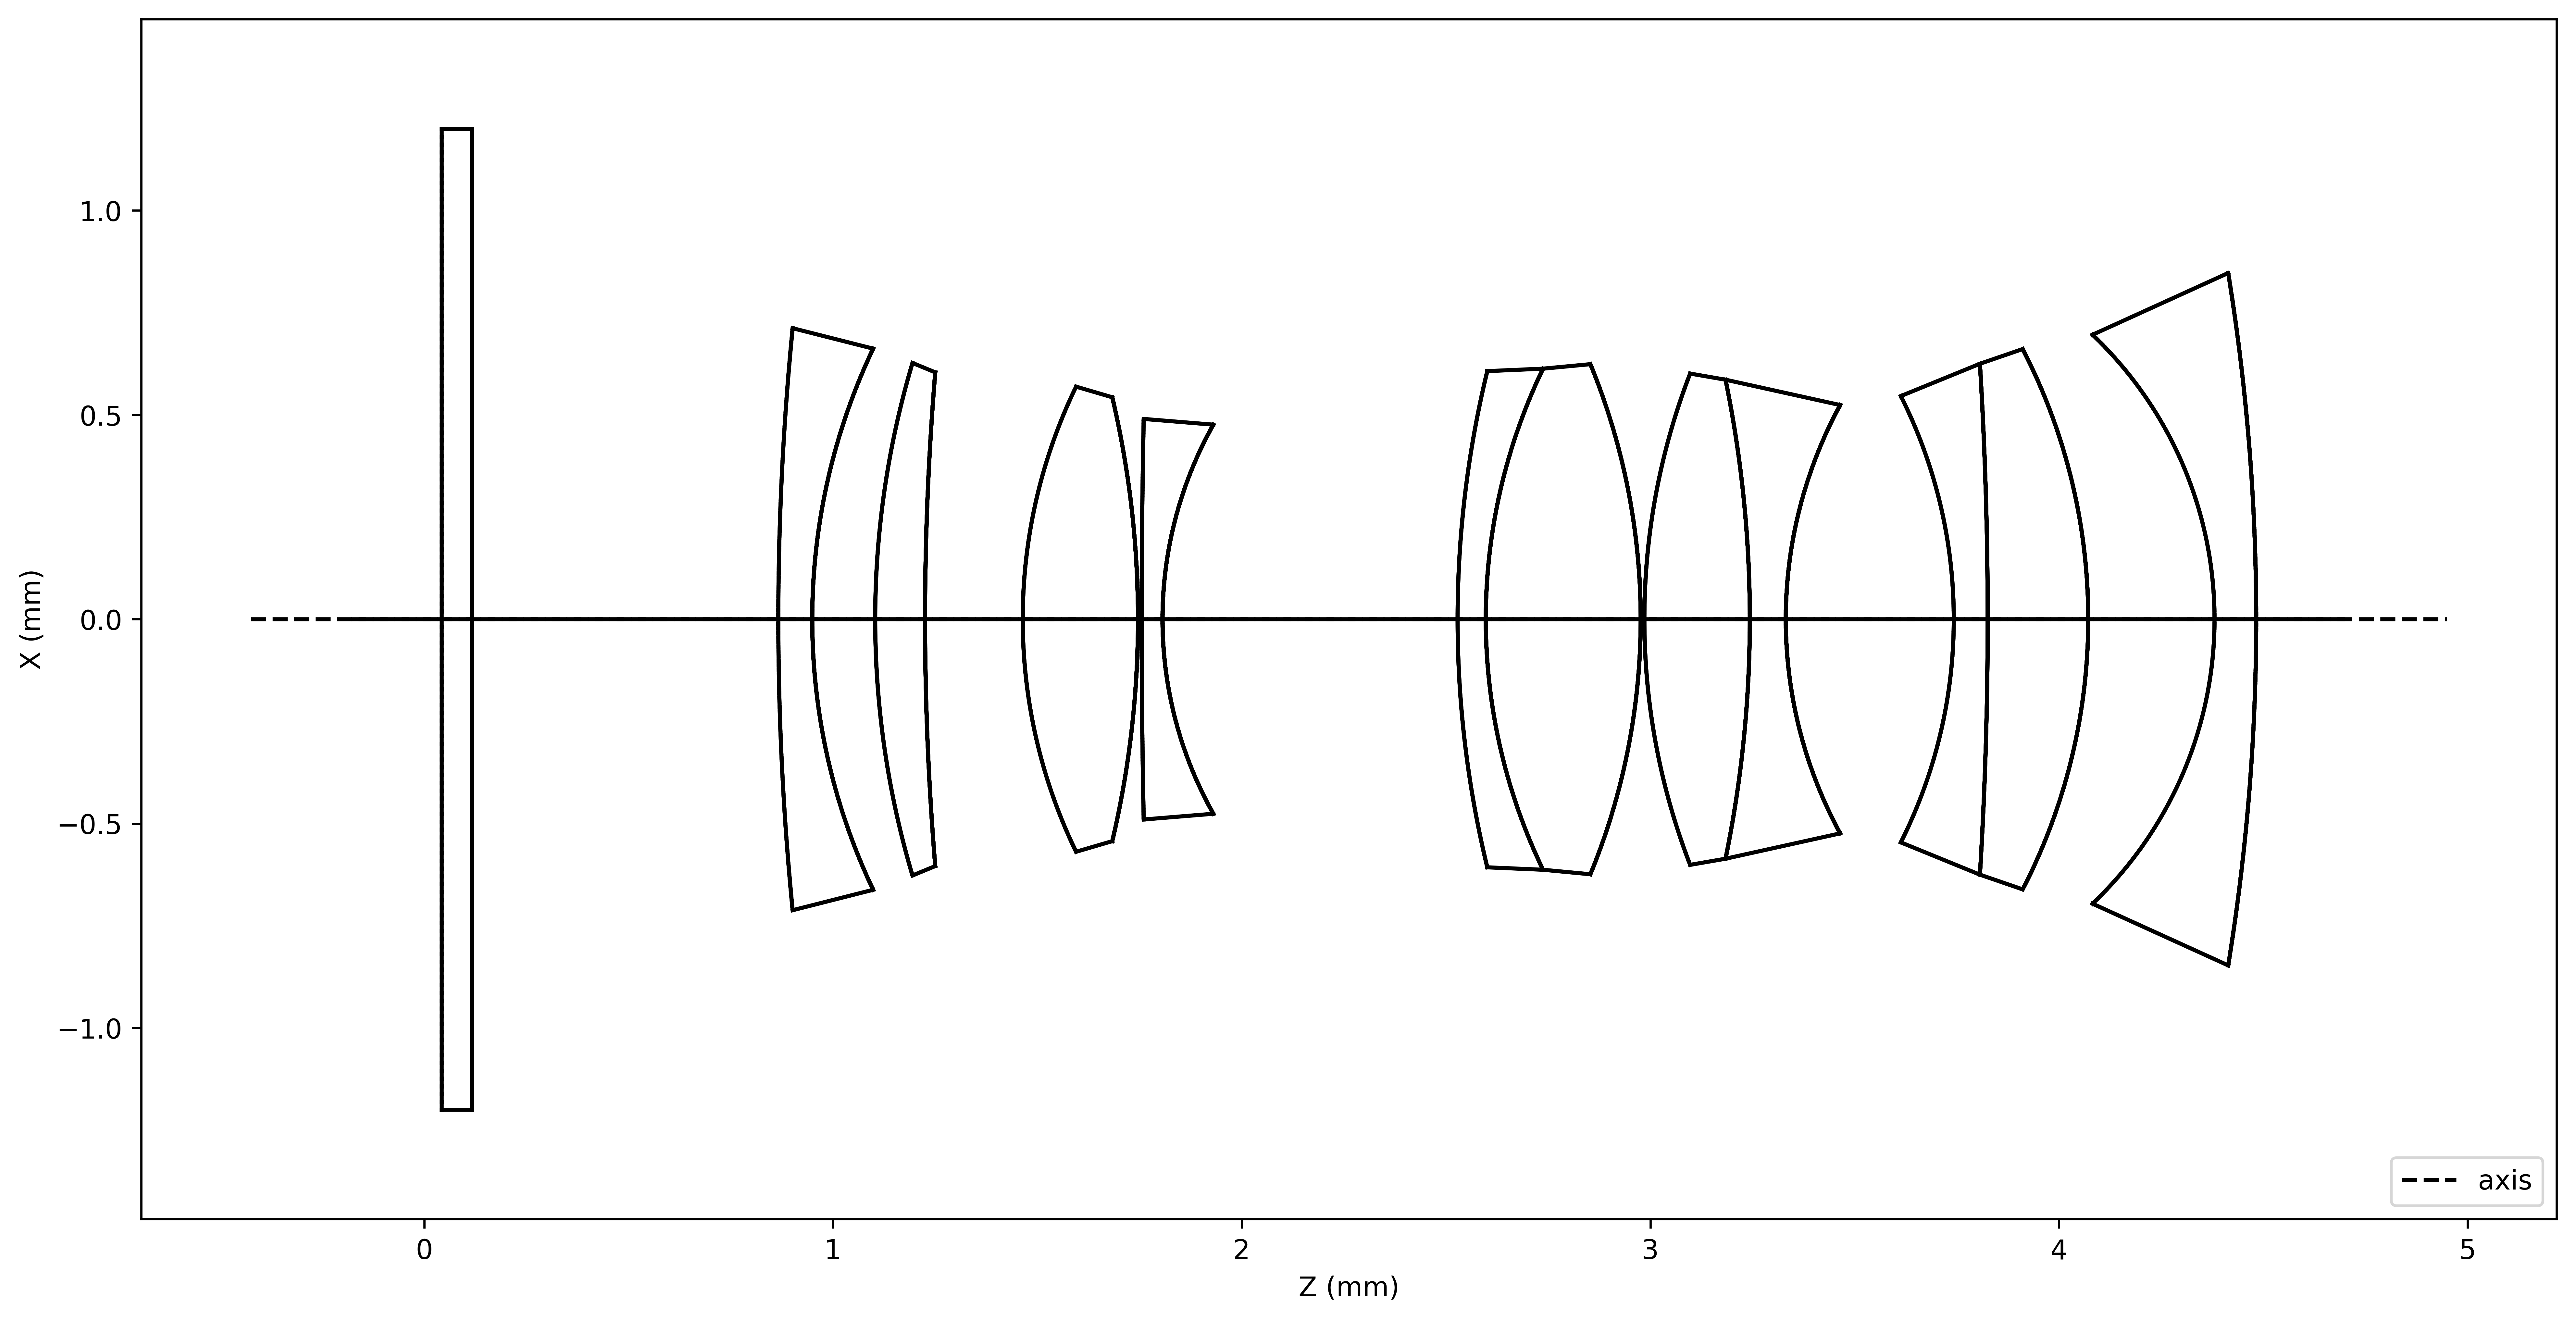

In [89]:
num_elements = len(elem_radii)
assert len(thicknesses) == num_elements
assert len(curvature_radii) == num_elements
assert len(mats) == num_elements

surfaces = []
z0 = 0.0
for i in reversed(range(num_elements)):
        table_idx = i + 1
        c = 1.0 / curvature_radii[i]
        t = thicknesses[i]
        radial_extent = elem_radii[i]
        z0 += t
        if table_idx in aspheric_data.keys():
                K, a4, a6, a8, a10, a12, a14, a16 = aspheric_data[table_idx]
                surf = EvenAsphericSurface(radial_extent=radial_extent, c=c, K=K, z0=z0, 
                        a4=a4, a6=a6, a8=a8, a10=a10, a12=a12, a14=a14, a16=a16)
        elif table_idx == aperture_tbl_index:
                surf = ConicSurface(radial_extent=radial_extent, c=0.0, K=0.0, z0=z0)
        else:
                surf = ConicSurface(radial_extent=radial_extent, c=c, K=0.0, z0=z0)
        surfaces.append(surf)

aperture_index = num_elements - aperture_tbl_index
print(f"{aperture_index=}")
print(num_elements)
materials = mats[:-1][::-1]
lens_system = LensSystem(surfaces, materials, aperture_index=aperture_index)

lens_system.disable_all_materials()

# TODO: fix aperture optim. freeze all variables except z0?
lens_system.disable_surface_at_index(aperture_index)
lens_system.disable_surface_vars("K")
lens_system.disable_surface_vars("z0")
lens_system.disable_surface_vars("c")

# # apply focal length constraint
# s1_params = lens_system.get_rear_surface_params(target_focal_length)
# lens_system.elements[0].surface.params['c'] = s1_params['c'].numpy().item()
# lens_system.elements[0].surface.params['z0'] = s1_params['z0'].numpy().item()
# lens_system.compute_paraxial_quantities()

print("Focal length target: ", 
        lens_system.compute_EFL(), " vs. ",
        target_focal_length)
print("BFL focus target: ", 
        lens_system.compute_BFL(), " vs. ",
        lens_system.elements[0].surface.params['z0'])

print("Exit pupil position: ", lens_system.exit_pupil_position)
print("Entrance pupil position: ", lens_system.entrance_pupil_position)

fig = plt.figure(figsize=(16,8), dpi=600)
_ = lens_system.draw_cross_section(64, fig=fig)

In [90]:
# lens_system.print()

[+] Wrote lens mesh (subdivs=7) file to: /home/chuah/mitsuba3-camera/notebooks/outputs/lens/lens0.ply
[+] Wrote baffle mesh file to: /home/chuah/mitsuba3-camera/notebooks/outputs/lens/baffle0.ply
[+] Wrote lens mesh (subdivs=7) file to: /home/chuah/mitsuba3-camera/notebooks/outputs/lens/lens1.ply
[+] Wrote baffle mesh file to: /home/chuah/mitsuba3-camera/notebooks/outputs/lens/baffle1.ply
[+] Wrote lens mesh (subdivs=7) file to: /home/chuah/mitsuba3-camera/notebooks/outputs/lens/lens2.ply
[+] Wrote baffle mesh file to: /home/chuah/mitsuba3-camera/notebooks/outputs/lens/baffle2.ply
[+] Wrote lens mesh (subdivs=7) file to: /home/chuah/mitsuba3-camera/notebooks/outputs/lens/lens3.ply
[+] Wrote baffle mesh file to: /home/chuah/mitsuba3-camera/notebooks/outputs/lens/baffle3.ply
[+] Wrote lens mesh (subdivs=7) file to: /home/chuah/mitsuba3-camera/notebooks/outputs/lens/lens4.ply
[+] Wrote baffle mesh file to: /home/chuah/mitsuba3-camera/notebooks/outputs/lens/baffle4.ply
[+] Wrote lens mesh 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


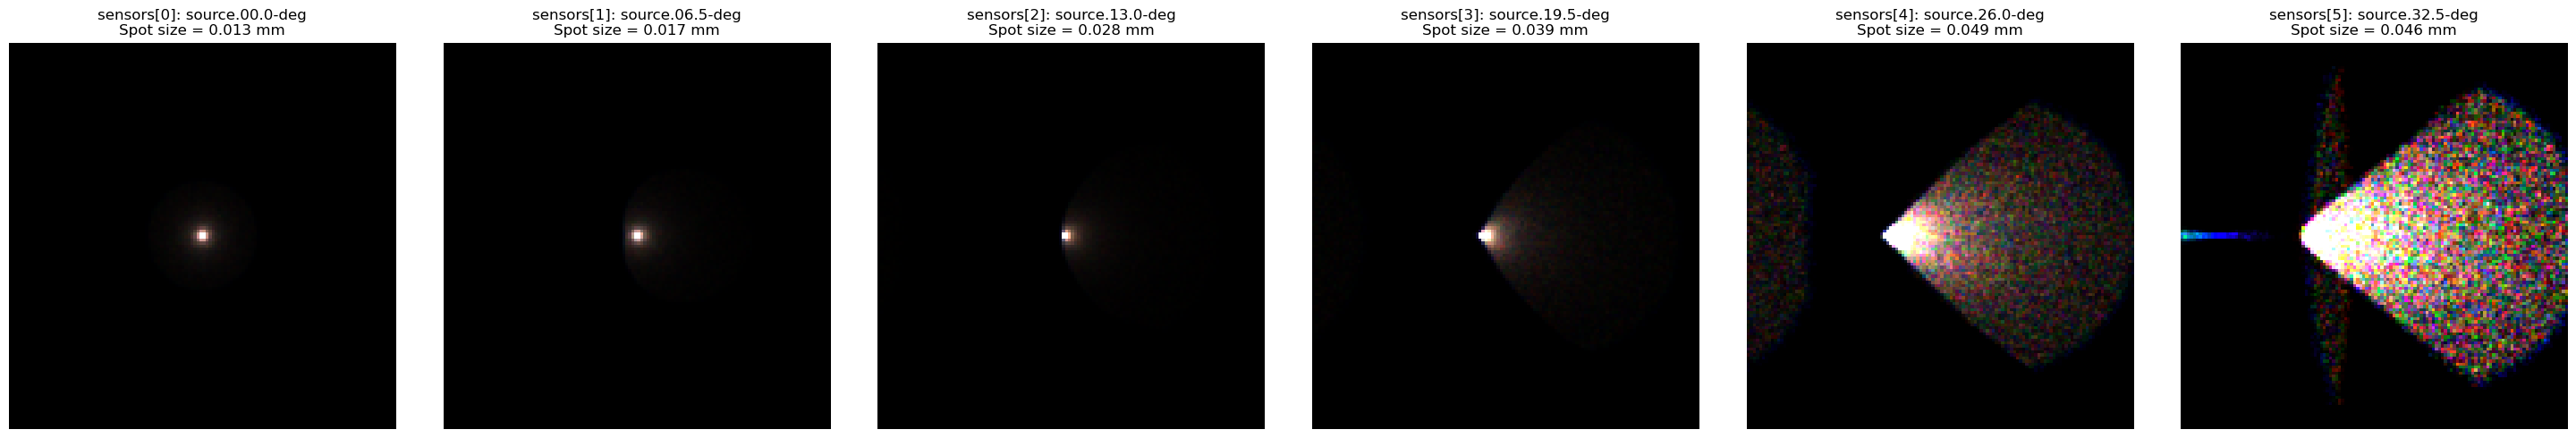

In [91]:
from scripts.lens_design.design_problem import ConstrainedEFLProblem, DesignProblem

# problem = ConstrainedEFLProblem(
#     lens_system,
#     resolution=(128, 128),
#     spp=64*4,
#     # learning_rate=0.05e-5,
#     # iters=200,
#     learning_rate=0.05e-5 * 10,
#     iters=200,
#     target_focal_length=target_focal_length,
#     output_dir=output_dir,
#     )

problem = DesignProblem(
    lens_system,
    resolution=(128, 128),
    spp=64*2, # 64*4
    # learning_rate=0.05e-5,
    # iters=200,
    learning_rate=0.05e-5 * 1000 * 0.6,
    iters=500,
    output_dir=output_dir,
    num_sources=num_sources,
    max_field_angle=max_field_angle,
    init_camera_z=init_camera_z,
    )

problem.prepare()
problem.plot_spots()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


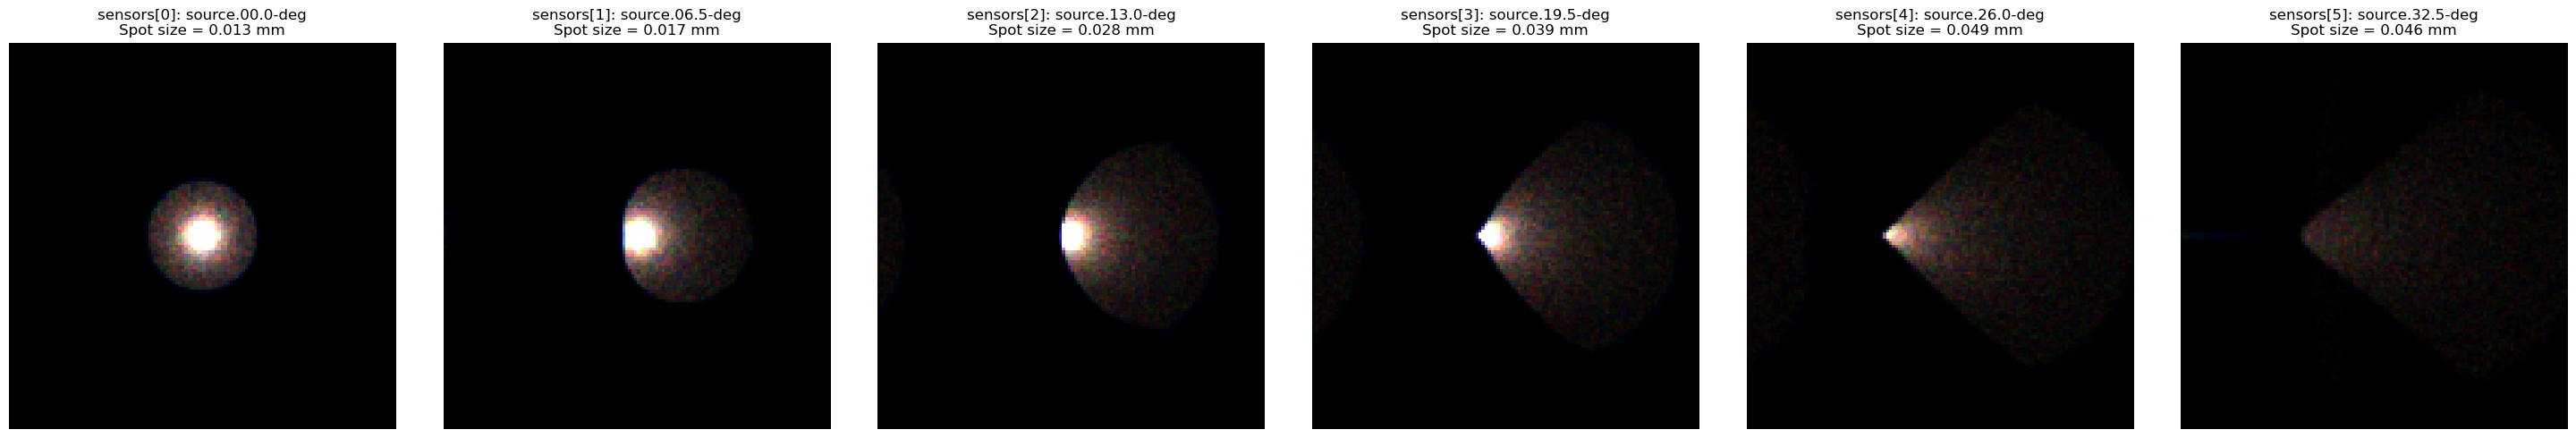

In [92]:
problem.plot_spots(scale=0.5)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


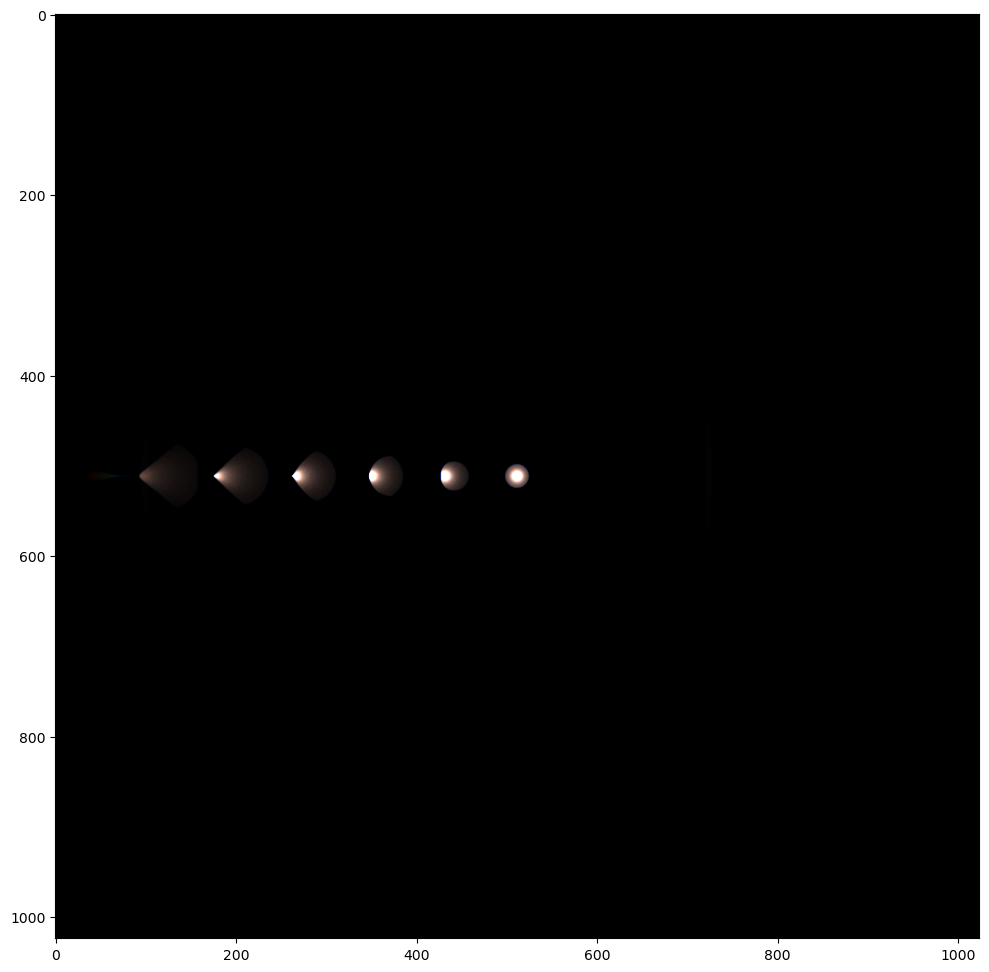

In [43]:
spots_init = problem.render(spp = 512, resolution = (1024, 1024), zoom_factor=0.1, sensor_idx=0)
plt.figure(figsize=(12,12))
plt.imshow(spots_init)

# mi.util.write_bitmap("caustic-test.exr", spots_init)

In [11]:
losses, images_final, images_init, upsample_steps, sizes_init, sizes_final = problem.optimize()

2024-05-30 02:08:16 WARN main [Mesh] Mesh::build_directed_edges(): there are 1280 non-manifold vertices in the follwing mesh: PLYMesh[
2024-05-30 02:08:16 WARN main [Mesh] name = "baffle5.ply",
2024-05-30 02:08:16 WARN main [Mesh] bbox = BoundingBox3f[
2024-05-30 02:08:16 WARN main [Mesh] min = [-0.6644, -0.6644, 1.25047],
2024-05-30 02:08:16 WARN main [Mesh] max = [0.6644, 0.6644, 1.25047]
2024-05-30 02:08:16 WARN main [Mesh] ],
2024-05-30 02:08:16 WARN main [Mesh] vertex_count = 1280,
2024-05-30 02:08:16 WARN main [Mesh] vertices = [30 KiB of vertex data],
2024-05-30 02:08:16 WARN main [Mesh] face_count = 2560,
2024-05-30 02:08:16 WARN main [Mesh] faces = [30 KiB of face data],
2024-05-30 02:08:16 WARN main [Mesh] face_normals = 0
2024-05-30 02:08:16 WARN main [Mesh] ]

2024-05-30 02:08:16 WARN main [Mesh] Mesh::build_directed_edges(): there are 1280 non-manifold vertices in the follwing mesh: PLYMesh[
2024-05-30 02:08:16 WARN main [Mesh] name = "baffle4.ply",
2024-05-30 02:08:16 WARN main [Mesh] bbox = BoundingBox3f[
2024-05-30 02:08:16 WARN main [Mesh] min = [-0.6897, -0.6897, 1.19474],
2024-05-30 02:08:16 WARN main [Mesh] max = [0.6897, 0.6897, 1.19474]
2024-05-30 02:08:16 WARN main [Mesh] ],
2024-05-30 02:08:16 WARN main [Mesh] vertex_count = 1280,
2024-05-30 02:08:16 WARN main [Mesh] vertices = [30 KiB of vertex data],
2024-05-30 02:08:16 WARN main [Mesh] face_count = 2560,
2024-05-30 02:08:16 WARN main [Mesh] faces = [30 KiB of face data],
2024-05-30 02:08:16 WARN main [Mesh] face_normals = 0
2024-05-30 02:08:16 WARN main [Mesh] ]

[sensor_32_5-deg] Setting new camera pos: [-9.04546082e-01 -8.94069672e-08  3.40000000e-02]
[sensor_32_5-deg] Setting new camera pos: [-9.26228583e-01 -8.94069672e-08  3.40000000e-02]
[sensor_32_5-deg] Setting new camera pos: [-9.44349051e-01 -8.94069672e-08  3.40000000e-02]
[sensor_26_0-deg] Setting new camera pos: [-7.28722036e-01  1.19209290e-07  3.40000000e-02]
[sensor_32_5-deg] Setting new camera pos: [-9.61077929e-01 -8.94069672e-08  3.40000000e-02]
Iter 40: upsampling to level 1 due to loss[0] = 7.060473442077637
Iter 41: upsampling to level 2 due to loss[0] = 1.789398431777954
[sensor_19_5-deg] Setting new camera pos: [-5.38436353e-01 -2.68220901e-07  3.40000000e-02]
[sensor_26_0-deg] Setting new camera pos: [-7.3312968e-01  1.1920929e-07  3.4000000e-02]
[sensor_26_0-deg] Setting new camera pos: [-7.37730026e-01  1.19209290e-07  3.40000000e-02]
[sensor_19_5-deg] Setting new camera pos: [-5.42791903e-01 -2.68220901e-07  3.40000000e-02]
[sensor_26_0-deg] Setting new camera pos: [

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


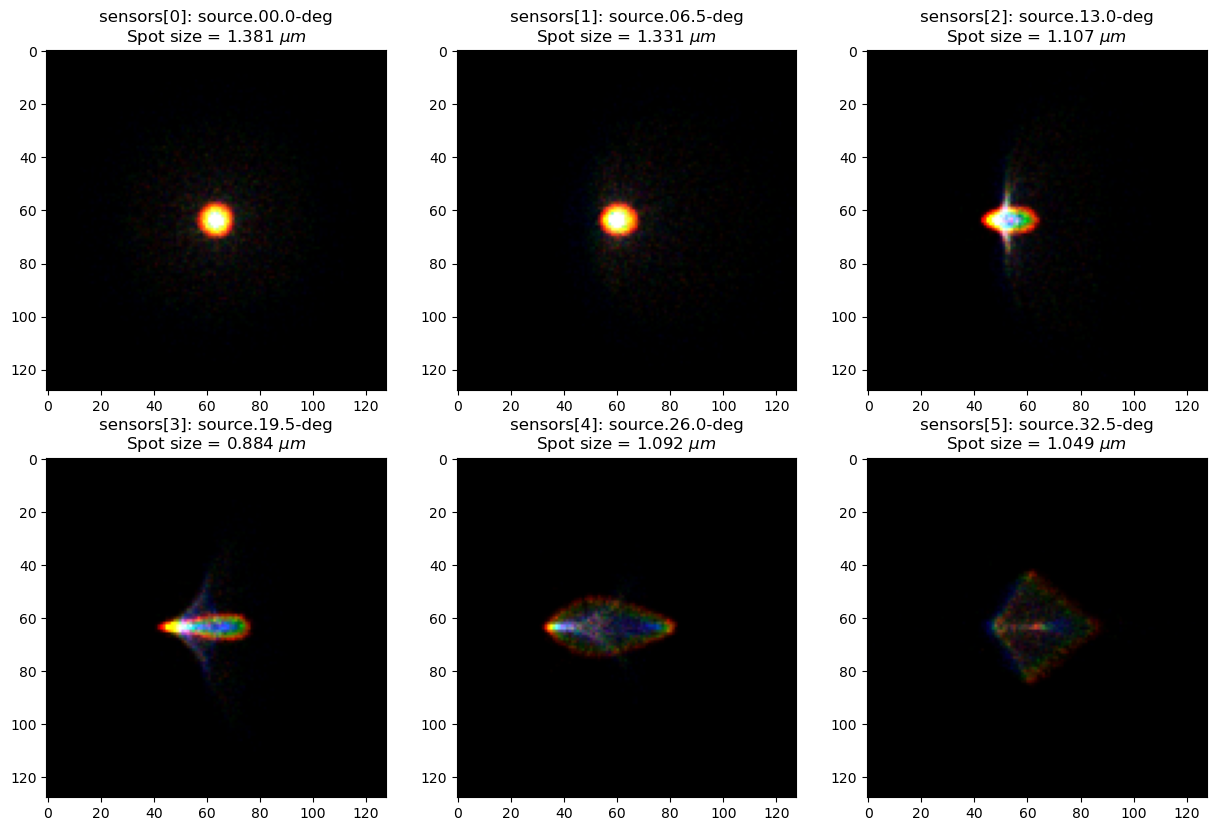

In [12]:
problem.plot_spots(scale=0.0005)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


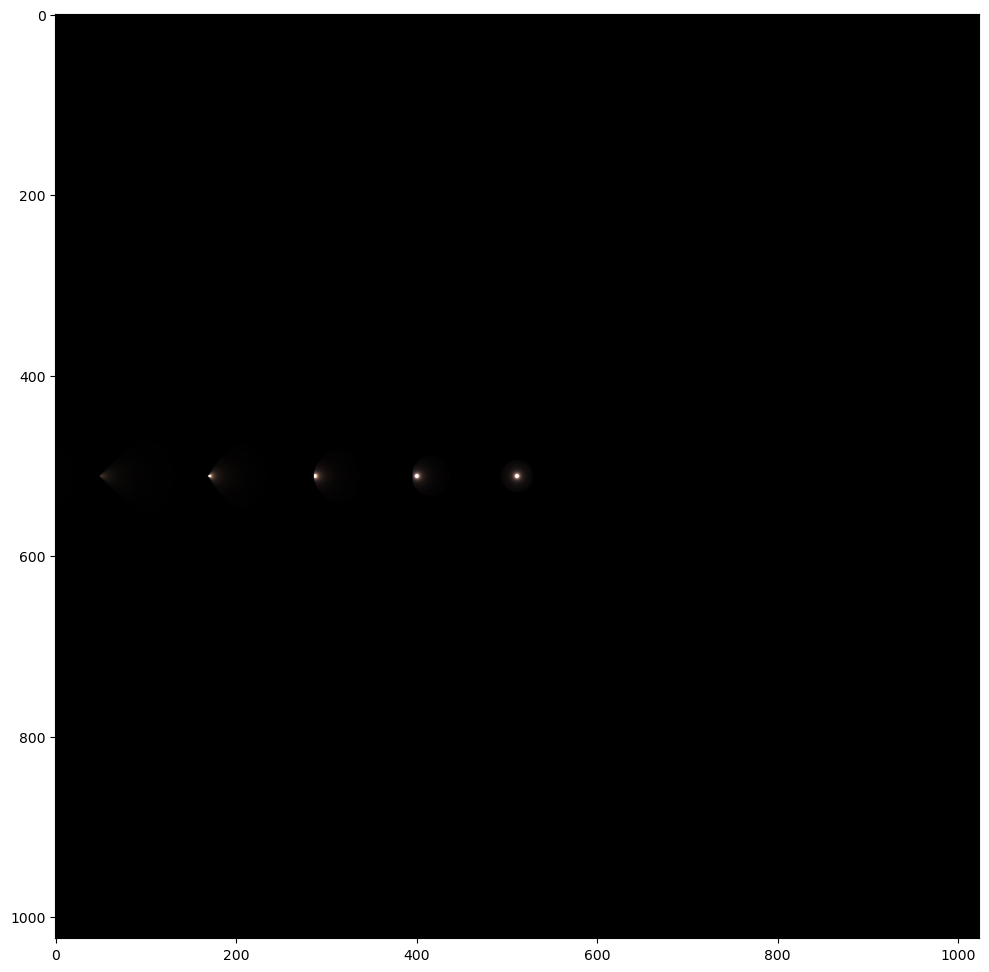

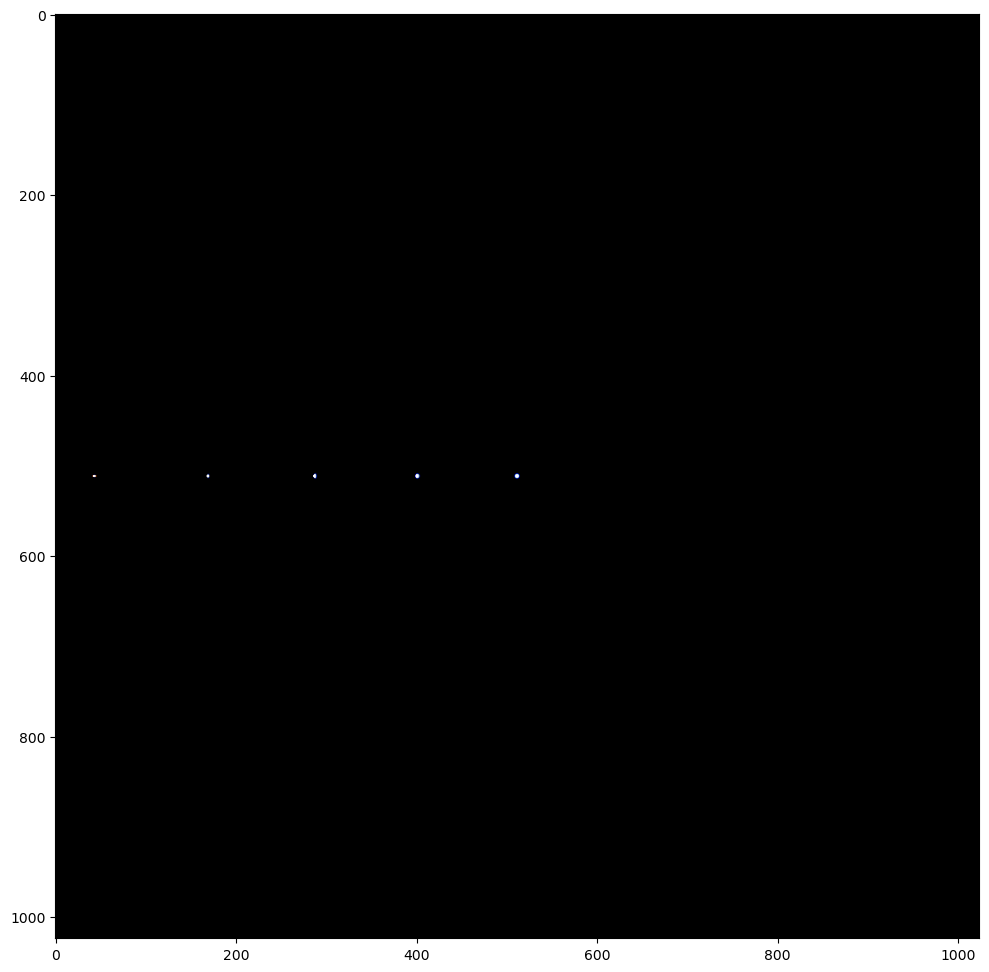

In [13]:
spots_final = problem.render(spp = 512, resolution = (1024, 1024), zoom_factor=0.1 / 2 ** upsample_steps)
plt.figure(figsize=(12,12))
plt.imshow(0.1 * spots_init)
plt.figure(figsize=(12,12))
plt.imshow(0.1 * spots_final)

# mi.util.write_bitmap("spots.exr", spots_final)

In [69]:
# for i in range(6):
#     img = problem.render(spp = 512, resolution = (1024, 1024), zoom_factor=16 / 2 ** upsample_steps, sensor_idx=i)
#     mi.util.write_bitmap(f"nikon-optim-caustic-{i}.exr", img)

# plt.figure(figsize=(12,12))
# plt.imshow(0.001*img)

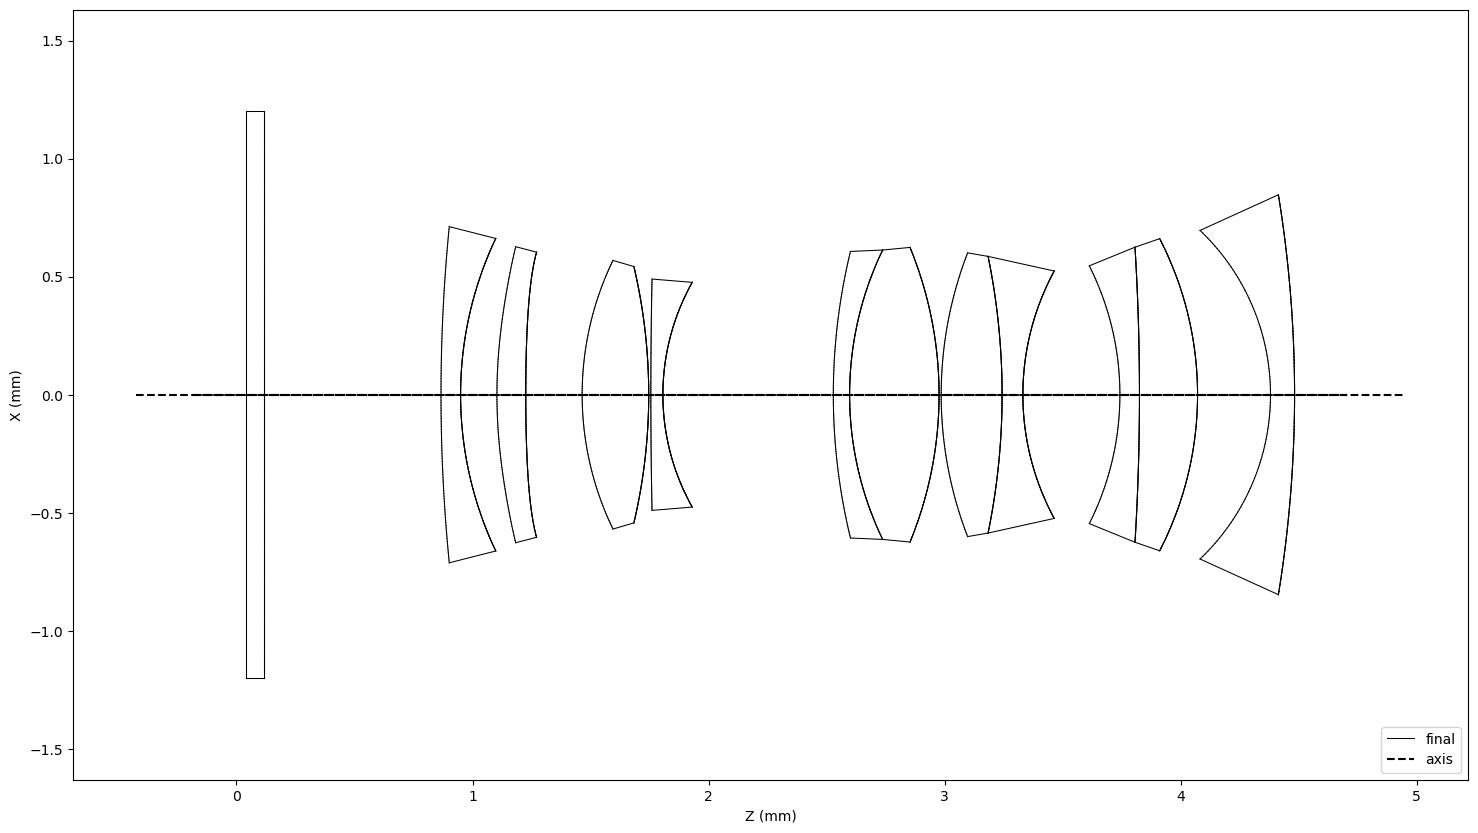

In [14]:
# TODO

# plt.legend()
# lens_init = LensSystem([ConicSurface(K=0, **surf) for surf in surfaces], materials, aperture_index=2)
# fig = lens_init.draw_cross_section(64, color='r', linestyle='--', label="init")
fig = plt.figure(figsize=(18,10))
_ = lens_system.draw_cross_section(64, color='k', fig=fig, label='final', linewidth=0.75)
# c = 60.84
# dx = 0.01
# dy = 0.01
# plt.xlim([c-dx,c+dx])
# plt.ylim([-dy,dy])

In [15]:
print(f"Upsampling steps: {upsample_steps}")

Upsampling steps: 4


### Compare initial and final spots

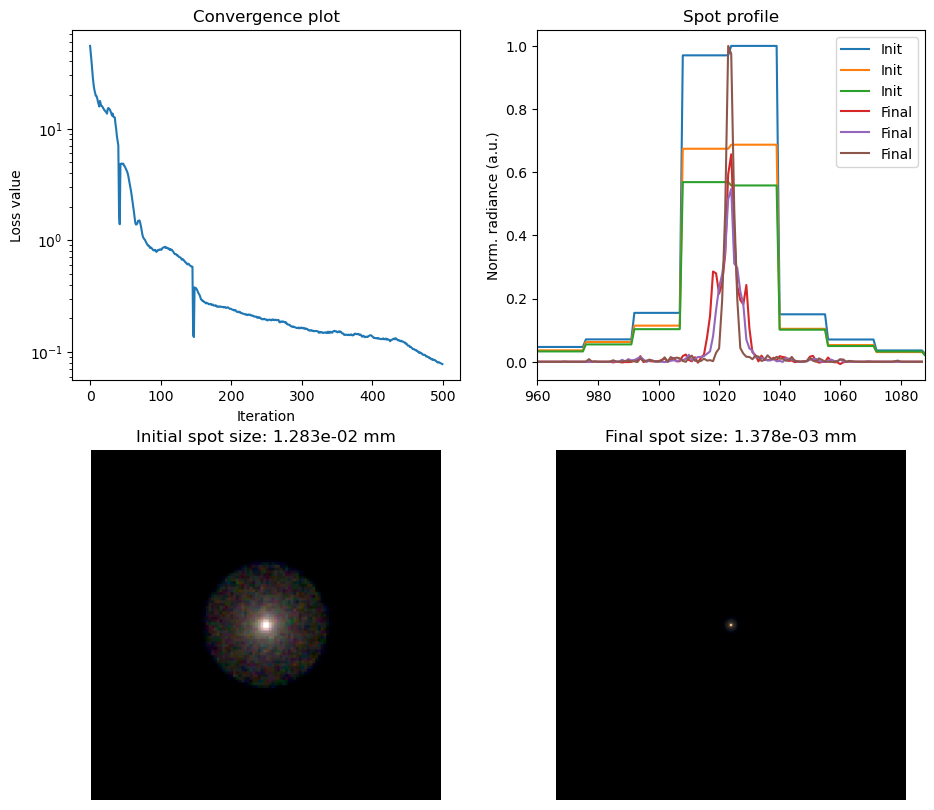

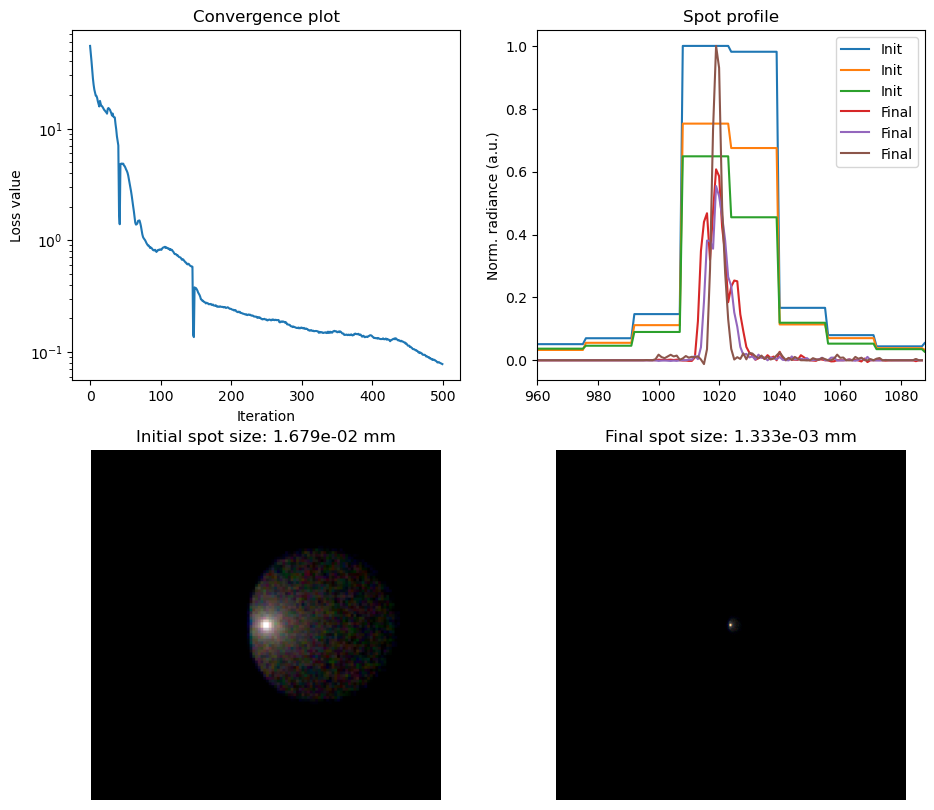

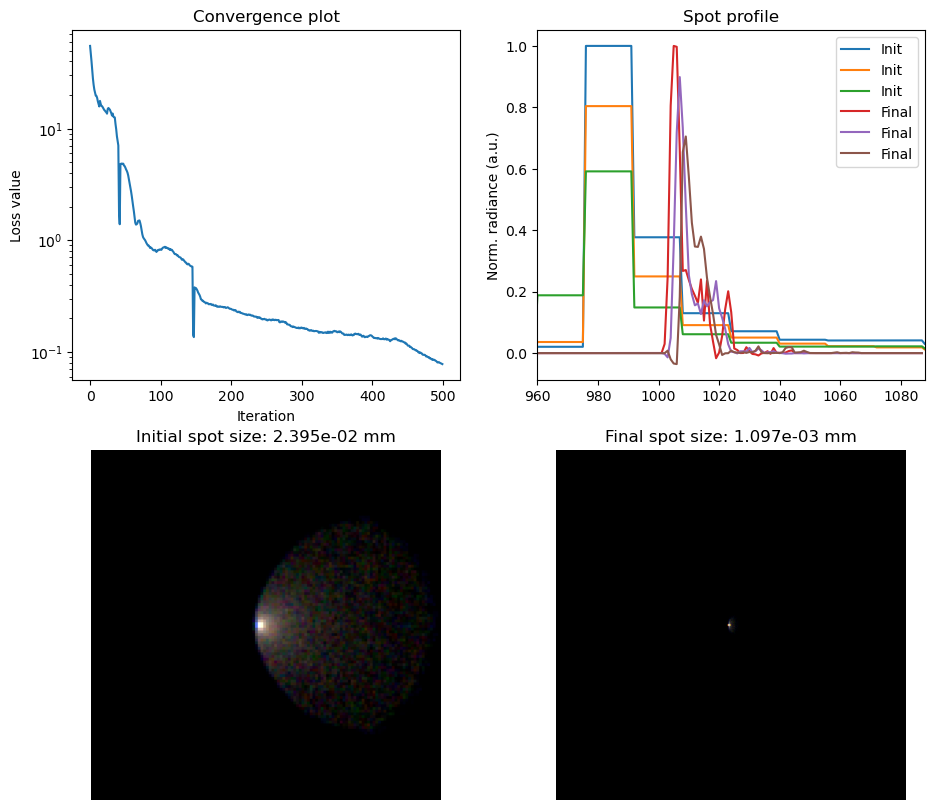

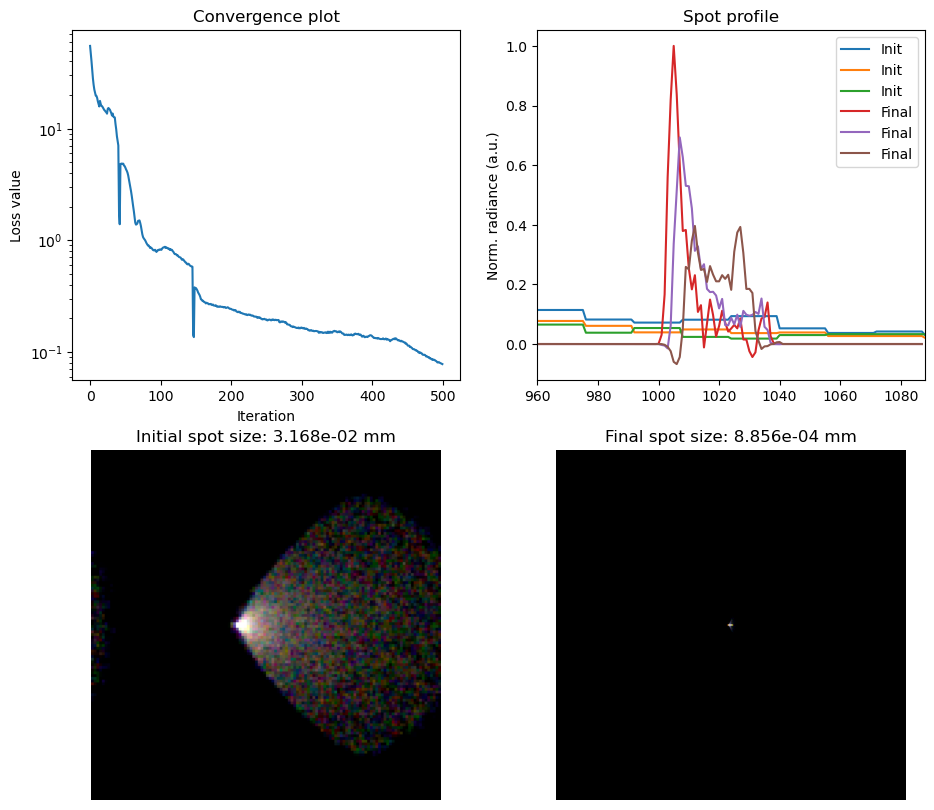

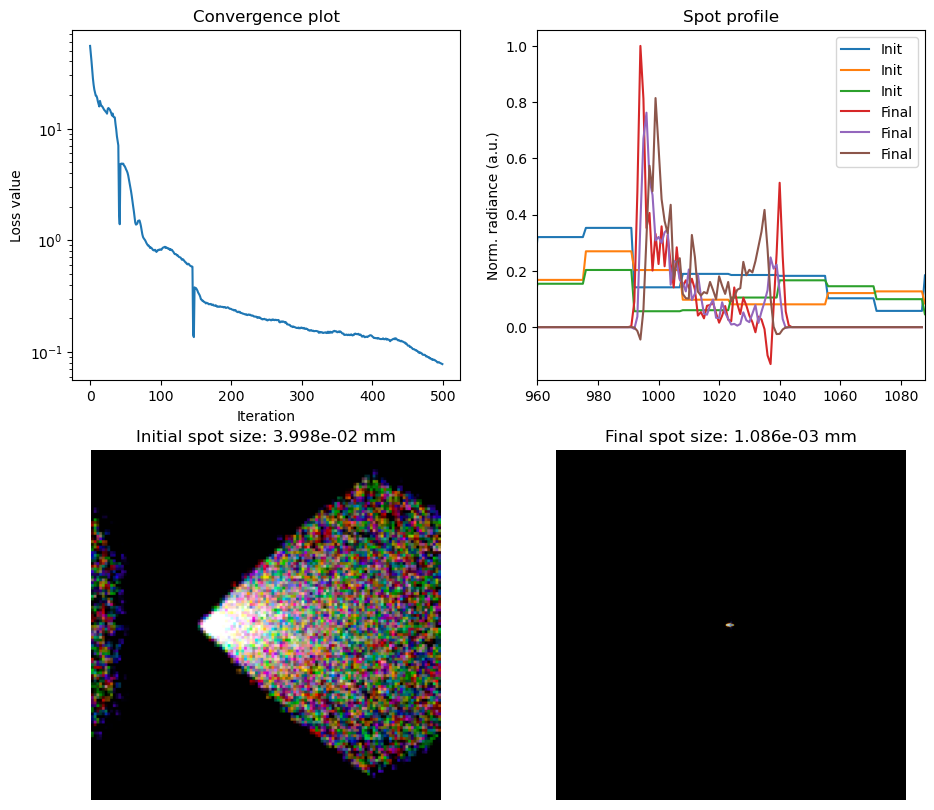

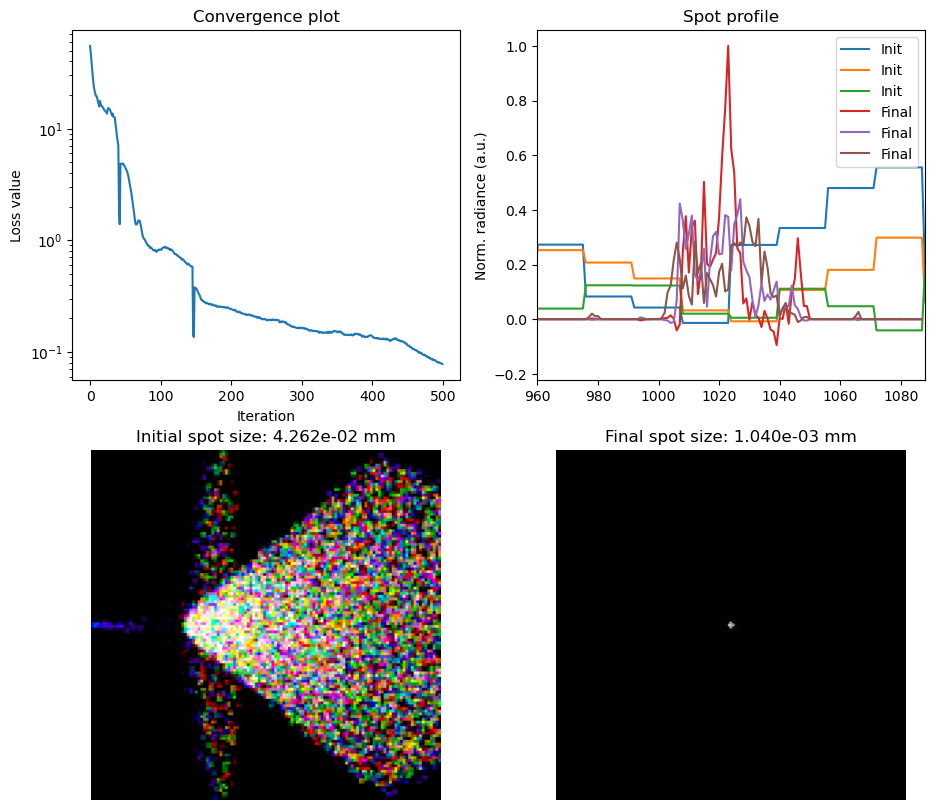

In [16]:
from scripts.lens_design.design_problem import plot_progress

for image_i, image_f, spot_size_init, spot_size_final in zip(images_init, images_final, sizes_init, sizes_final):
    _ = plot_progress(image_i, image_f, spot_size_init, spot_size_final, losses, upsample_steps, False)
    # mi.util.write_bitmap("spot_i.exr", image_i)
    # mi.util.write_bitmap("spot_f.exr", image_f)


### Show optimized values

In [24]:
print(problem.optimizer.variables)

{'lens4_a4': [0.01900663413107395],
 'lens4_a6': [0.0058863298036158085],
 'lens4_a8': [-0.0005935071967542171],
 'lens4_a10': [-0.0025082190986722708],
 'lens4_a12': [-0.002270597731694579],
 'lens4_a14': [-0.0012083689216524363],
 'lens4_a16': [0.00010863887291634455],
 'lens5_a4': [-0.020926576107740402],
 'lens5_a6': [-0.008684025146067142],
 'lens5_a8': [-0.0023606878239661455],
 'lens5_a10': [-0.0001714953687041998],
 'lens5_a12': [-2.792111990856938e-05],
 'lens5_a14': [-0.000720648153219372],
 'lens5_a16': [-0.0017022313550114632]}

In [55]:
for tbl_idx in aspheric_data.keys():
    lens_idx = num_elements - tbl_idx
    surf = problem.lens_system.elements[lens_idx].surface
    c = surf.get_curvature()
    K = surf.get_kappa()
    ai = surf.get_aspheric_coefficients()
    print(f"Lens {tbl_idx} params:")
    print(f"\t{c=},\n\t{K=},")
    print(",\n".join([f"\ta{idx}={a}" for idx, a in zip(np.arange(4,18,2), ai)]))

    # print(surf.params)


Lens 17 params:
	c=-0.13666990118766142,
	K=0.0,
	a4=[-0.09490284323692322],
	a6=[-0.10803833603858948],
	a8=[-0.08069773763418198],
	a10=[-0.01646527275443077],
	a12=[-0.007415791507810354],
	a14=[-0.503877580165863],
	a16=[-3.2629644870758057]
Lens 18 params:
	c=-0.45454545454545453,
	K=0.0,
	a4=[0.07706142961978912],
	a6=[0.06080370396375656],
	a8=[-0.015299857594072819],
	a10=[-0.16691075265407562],
	a12=[-0.38500601053237915],
	a14=[-0.5226516723632812],
	a16=[0.1124117523431778]


### RMS comparison plots

mean_init=1.038e+00
mean_sph=2.967e+01
mean_opt=1.097e+00


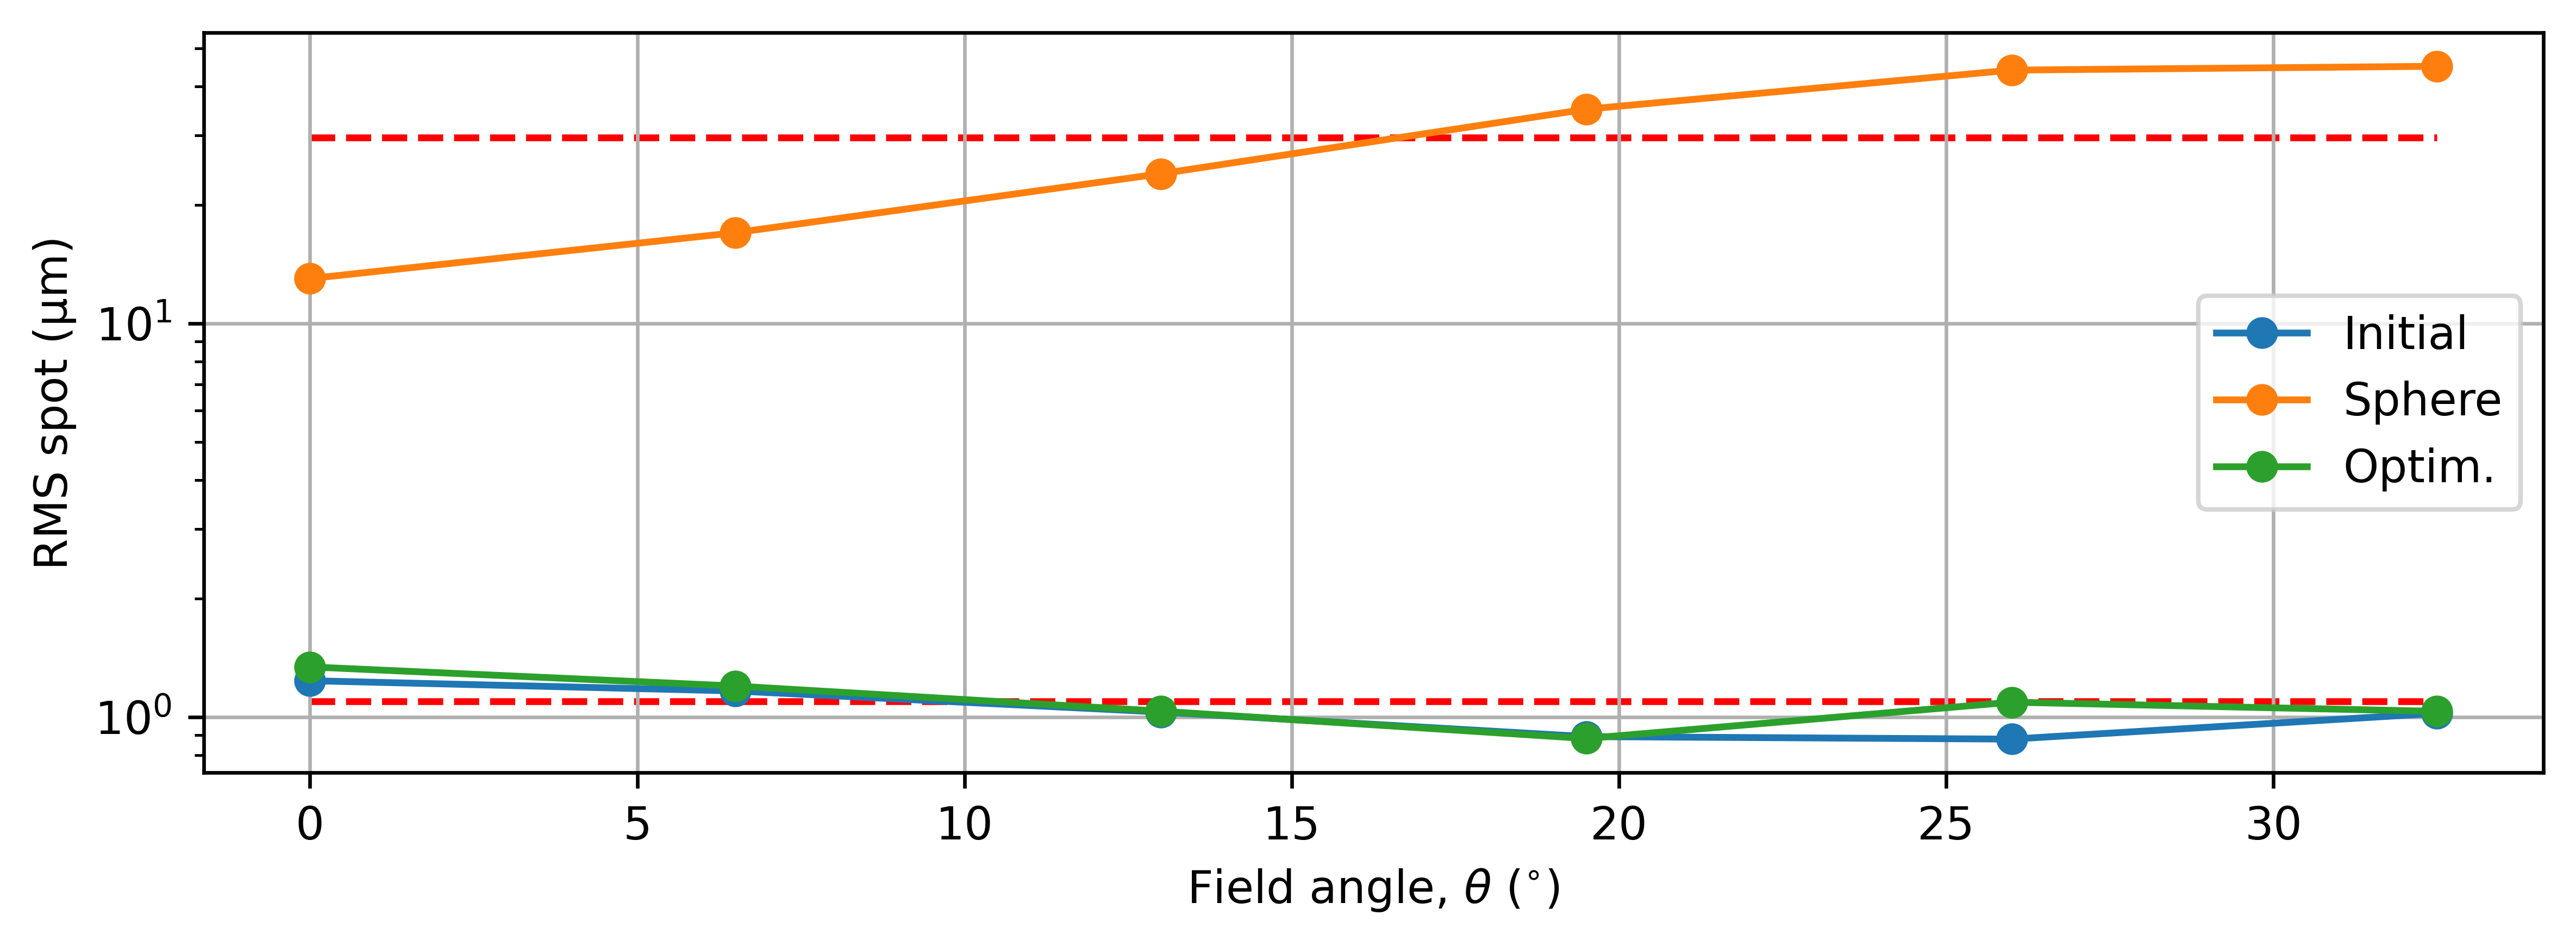

In [24]:
thetas   = np.array([0, 6.5, 13, 19.5, 26, 32.5])
rms_init = np.array([1.237, 1.165, 1.03, 0.892, 0.879, 1.022])
rms_sph  = np.array([13, 17, 24, 35, 44, 45])
rms_opt  = np.array([1.341, 1.199, 1.035, 0.882, 1.091, 1.034])

plt.figure(figsize=(8,3), dpi=600)
plt.semilogy(thetas, rms_init, '-o', label="Initial")
plt.semilogy(thetas, rms_sph , '-o', label="Sphere")
plt.semilogy(thetas, rms_opt , '-o', label="Optim.")
plt.legend()
plt.grid('on')
plt.xlabel(r"Field angle, $\theta$ ($^{\circ}$)")
plt.ylabel(r"RMS spot (µm)")

mean_init = np.mean(rms_init)
mean_sph  = np.mean(rms_sph)
mean_opt  = np.mean(rms_opt)
plt.plot([thetas[0], thetas[-1]], [mean_sph, mean_sph], 'r--', zorder=-2)
plt.plot([thetas[0], thetas[-1]], [mean_opt, mean_opt], 'r--', zorder=-2)
print(f"{mean_init=:.3e}")
print(f"{mean_sph=:.3e}")
print(f"{mean_opt=:.3e}")
plt.tight_layout()